In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import GridSearchCV ,train_test_split
import joblib
from sklearn.metrics import  accuracy_score,roc_auc_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv("downloads/customer_churn_data.csv")

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.columns=df.columns.str.lower()

In [7]:
df.head()

,customerid,age,gender,tenure,monthlycharges,contracttype,internetservice,totalcharges,techsupport,churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [8]:
df["internetservice"] = df["internetservice"].fillna(" ")

In [9]:
df.isnull().sum()

customerid         0
age                0
gender             0
tenure             0
monthlycharges     0
contracttype       0
internetservice    0
totalcharges       0
techsupport        0
churn              0
dtype: int64

Text(0, 0.5, '')

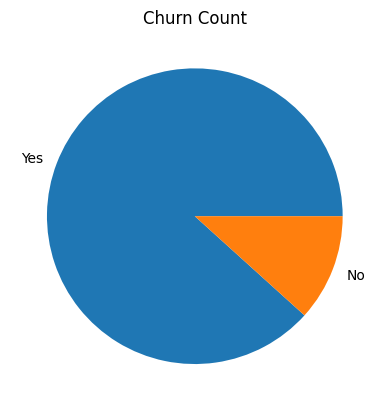

In [10]:
df["churn"].value_counts().plot(kind="pie")
plt.title("Churn Count")
plt.ylabel("")

In [11]:
df.describe()

,customerid,age,tenure,monthlycharges,totalcharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
numerical_col=df.select_dtypes(include=["number"])

In [13]:
numerical_col.corr()

,customerid,age,tenure,monthlycharges,totalcharges
customerid,1.000000,0.036730,-0.018585,-0.030504,-0.027490
age,0.036730,1.000000,0.000472,0.006362,-0.001896
tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
monthlycharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
totalcharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


(array([105.,  94., 105., 108.,  93., 104., 114.,  81., 108.,  88.]),
 array([ 30.   ,  38.996,  47.992,  56.988,  65.984,  74.98 ,  83.976,
         92.972, 101.968, 110.964, 119.96 ]),
 <BarContainer object of 10 artists>)

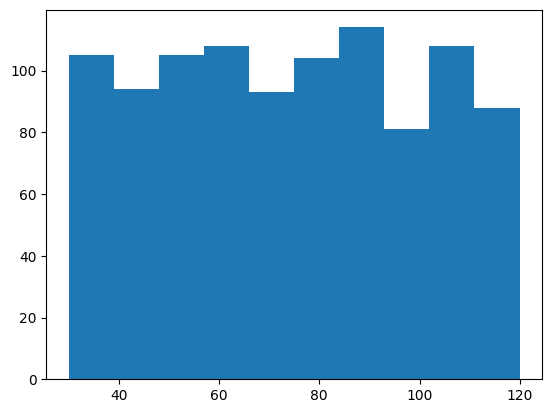

In [14]:
plt.hist(df["monthlycharges"])

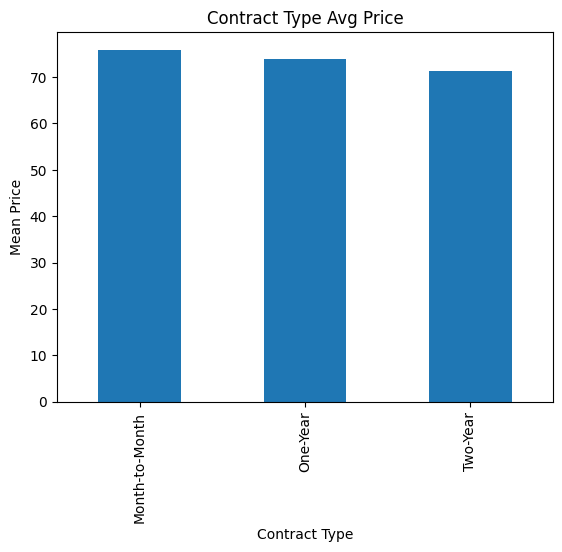

In [15]:
df.groupby("contracttype")["monthlycharges"].mean().plot(kind="bar")
plt.xlabel("Contract Type")
plt.ylabel("Mean Price")
plt.title("Contract Type Avg Price");

In [16]:
df.columns 

Index(['customerid', 'age', 'gender', 'tenure', 'monthlycharges',
       'contracttype', 'internetservice', 'totalcharges', 'techsupport',
       'churn'],
      dtype='object')

In [17]:
X=df.drop(columns=["customerid","churn"])
y=df["churn"]

In [18]:
numerical_features=["age","tenure","monthlycharges","totalcharges"]
categorial_features=["gender","contracttype","internetservice","techsupport"]

In [90]:
scalar=StandardScaler()

In [91]:
joblib.dump(scalar,"scalar.pkl")

['scalar.pkl']

In [19]:
preprocessing=ColumnTransformer([
    ("num",StandardScaler(),numerical_features),
    ("cat",OneHotEncoder(drop="first",handle_unknown="ignore"),categorial_features)
])

In [20]:
model=Pipeline([
    ("preprocessing",preprocessing),
    ("logisticregression",LogisticRegression())
])

In [21]:
model

,steps,"[('preprocessing', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "logisticregression__penalty": ["l1", "l2"],
    "logisticregression__solver": ["liblinear"],
    "logisticregression__class_weight": ["balanced"],
    "logisticregression__max_iter": [500, 1000]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)


In [37]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,stratify=y,random_state=42
)

In [89]:
X_train.columns

Index(['age', 'gender', 'tenure', 'monthlycharges', 'contracttype',
       'internetservice', 'totalcharges', 'techsupport'],
      dtype='object')

In [83]:
X_train

,age,gender,tenure,monthlycharges,contracttype,internetservice,totalcharges,techsupport
270,59,Female,5,81.69,Month-to-Month,Fiber Optic,408.45,Yes
938,47,Female,9,31.88,One-Year,Fiber Optic,286.92,Yes
329,51,Female,66,53.69,One-Year,,3543.54,No
886,50,Male,7,91.40,Month-to-Month,DSL,639.80,No
769,63,Female,6,39.26,Month-to-Month,,235.56,No
...,...,...,...,...,...,...,...,...
436,61,Female,1,70.20,One-Year,Fiber Optic,70.20,No
933,23,Male,5,47.09,One-Year,Fiber Optic,235.45,Yes
209,83,Male,2,86.04,Month-to-Month,DSL,172.08,No
550,45,Male,30,117.40,Two-Year,DSL,3522.00,Yes


In [44]:
model.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [78]:
print("Best ROC-AUC score:",grid.best_score_)
print("Best parameters:", grid.best_params_)

Best ROC-AUC score: 0.9946160977310923
Best parameters: {'logisticregression__C': 100, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 500, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [46]:
y_pred=model.predict(X_test)

In [50]:
accuracy_score(y_pred,y_test)

0.93

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      0.39      0.56        23
         Yes       0.93      1.00      0.96       177

    accuracy                           0.93       200
   macro avg       0.96      0.70      0.76       200
weighted avg       0.94      0.93      0.92       200



In [62]:
cm=confusion_matrix(y_test,y_pred)

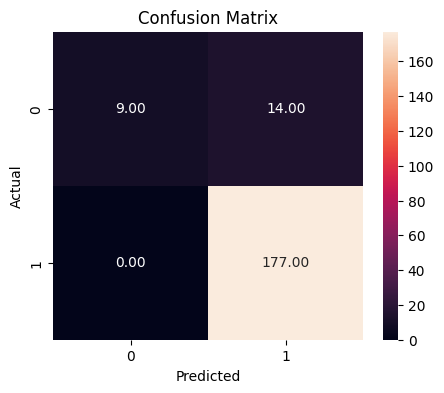

In [74]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [81]:
joblib.dump(model,"churn_prediction_model.pkl")

['churn_prediction_model.pkl']